Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. 

Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [13]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Confusion Matrix:



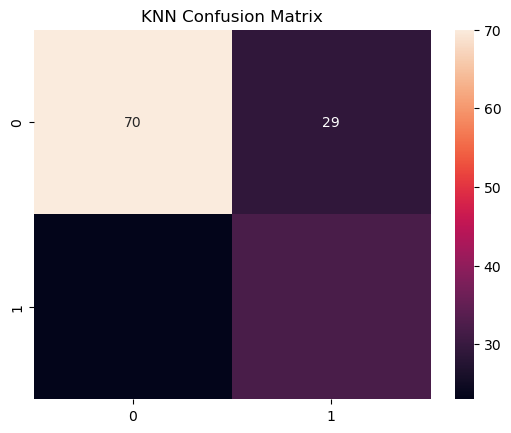

Accuracy: 66.23376623376623
Error Rate: 0.33766233766233766
Precision: 0.5245901639344263
Recall: 0.5818181818181818


In [16]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n")
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()

print("Accuracy:", accuracy*100)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

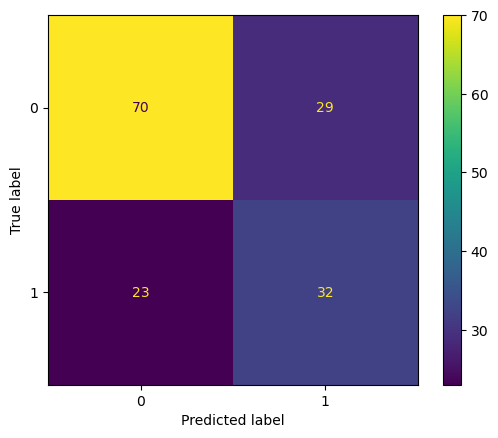

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1])
cm_display.plot()
plt.show()

## Required Theory
# 1. K-Nearest Neighbors (KNN):

KNN is a simple, non-parametric, lazy-learning algorithm used for classification and regression. It works by finding the k closest data points (neighbors) to a test instance and classifies the instance based on the majority label among these neighbors. In this context, the KNN algorithm will help predict whether a person has diabetes based on medical measurements and features.

# 2. Confusion Matrix:

A confusion matrix is a table that summarizes the performance of a classification model. Each row represents the instances in a predicted class, while each column represents the instances in an actual class. It provides insights into the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

# 3. Metrics:

Accuracy: The proportion of correct predictions (both true positives and true negatives) out of all predictions.

Error Rate: The proportion of incorrect predictions out of all predictions. It’s equal to 

Precision: The proportion of true positive predictions out of all positive predictions. It tells us how many of the predicted positives were actually correct.

Recall (Sensitivity): The proportion of true positive predictions out of all actual positives. It tells us how well the model detects true positives.